In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data

In [2]:
gas=pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\neural network\\gas_turbines.csv")

In [3]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


### Checking for null values

In [4]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


### Checking for duplicate values

In [5]:
gas[gas.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


### Distributions of the independant variables

C:\Users\Govind S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AT', ylabel='Density'>

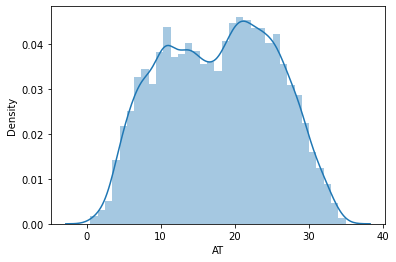

In [6]:
sns.distplot(gas.AT)

C:\Users\Govind S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AP', ylabel='Density'>

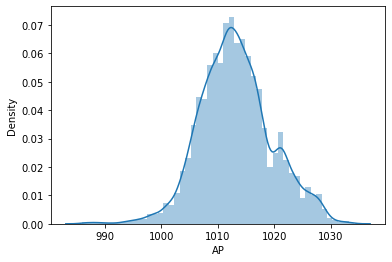

In [7]:
sns.distplot(gas.AP)

C:\Users\Govind S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AH', ylabel='Density'>

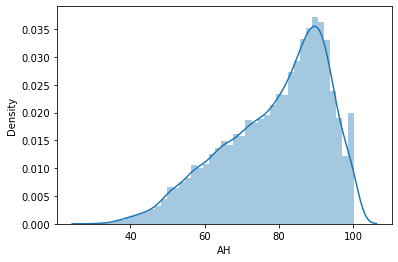

In [8]:
sns.distplot(gas.AH)

### Splitting dependant and independant variables

In [9]:
y=gas["TEY"]

### Only taking ambient variables as independant variables

In [10]:
x=gas.iloc[:,:3]

In [11]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [12]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

### Converting the independant variables into a numpy array

In [13]:
x1=x.values

In [14]:
x1


array([[   6.8594, 1007.9   ,   96.799 ],
       [   6.785 , 1008.4   ,   97.118 ],
       [   6.8977, 1008.8   ,   95.939 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 ],
       [   7.006 , 1006.8   ,   99.008 ],
       [   6.9279, 1007.2   ,   97.533 ]])

In [15]:
y1=y.values

In [16]:
y1

array([114.7 , 114.72, 114.71, ..., 110.19, 110.74, 111.58])

### Model Building

### We use relu as activation function n input and hidden layers and linear as activation function in the output layer.

### We use mean squared error as the loss function

In [17]:
model=Sequential()
model.add(Dense(3,  activation='relu'))
model.add(Dense(3,  activation='relu'))
model.add(Dense(1, activation='linear'))

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
history=model.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 2s 2ms/step - loss: 252.5731 - val_loss: 255.9574
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: 249.1771 - val_loss: 230.6370
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: 245.6435 - val_loss: 242.1958
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: 243.4687 - val_loss: 239.6220
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: 241.0102 - val_loss: 237.2539
Epoch 6/250
1008/1008 [==============================] - 2s 2ms/step - loss: 238.4094 - val_loss: 232.3664
Epoch 7/250
1008/1008 [==============================] - 2s 2ms/step - loss: 237.0009 - val_loss: 244.2709
Epoch 8/250
1008/1008 [==============================] - 2s 2ms/step - loss: 235.1303 - val_loss: 287.8784
Epoch 9/250
1008/1008 [==============================] - 2s 2ms/step - loss: 234.4133 - val_loss: 229.2859
Epoch 10/250
1008/1008 [=============

Epoch 77/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.5347 - val_loss: 226.6165
Epoch 78/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.1046 - val_loss: 223.8110
Epoch 79/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.3103 - val_loss: 226.9176
Epoch 80/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.9935 - val_loss: 225.2336
Epoch 81/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.6544 - val_loss: 223.3481
Epoch 82/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.1336 - val_loss: 223.3500
Epoch 83/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.8345 - val_loss: 228.8862
Epoch 84/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.7001 - val_loss: 239.0502
Epoch 85/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.3089 - val_loss: 223.4453
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 2s 2ms/step - loss: 224.9475 - val_loss: 224.8102
Epoch 228/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.6868 - val_loss: 223.3536
Epoch 229/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.3947 - val_loss: 223.4559
Epoch 230/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.4916 - val_loss: 223.8194
Epoch 231/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.2322 - val_loss: 232.4155
Epoch 232/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.5776 - val_loss: 226.3480
Epoch 233/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.1564 - val_loss: 224.4619
Epoch 234/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.3445 - val_loss: 223.3209
Epoch 235/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.7717 - val_loss: 240.8496
Epoch 236/250
1008/1008 [========

In [20]:
model.evaluate(x1,y1)

470/470 [==============================] - 1s 1ms/step - loss: 223.4343


223.43431091308594

### The model has as mse error of 223.43

In [21]:
pred=model.predict(x1)

470/470 [==============================] - 1s 1ms/step


In [22]:
pred

array([[136.18983],
       [136.23315],
       [136.58533],
       ...,
       [134.73636],
       [135.18369],
       [135.78278]], dtype=float32)

In [23]:
history.history

{'loss': [252.5730743408203,
  249.1770782470703,
  245.6434783935547,
  243.46868896484375,
  241.0101776123047,
  238.40943908691406,
  237.00086975097656,
  235.13027954101562,
  234.4132537841797,
  232.57696533203125,
  231.56503295898438,
  230.58535766601562,
  229.54818725585938,
  228.10360717773438,
  227.7517852783203,
  227.82798767089844,
  227.119140625,
  226.6081085205078,
  227.35740661621094,
  226.23764038085938,
  226.1208038330078,
  225.47213745117188,
  225.74905395507812,
  225.65853881835938,
  226.0307159423828,
  225.41668701171875,
  225.4617462158203,
  225.0486297607422,
  224.5885009765625,
  225.749755859375,
  224.51707458496094,
  225.63351440429688,
  225.63465881347656,
  225.1621856689453,
  225.26600646972656,
  224.8794708251953,
  224.87709045410156,
  224.7895965576172,
  224.8203582763672,
  225.37229919433594,
  224.78329467773438,
  224.7683563232422,
  224.60276794433594,
  224.4738006591797,
  225.01124572753906,
  224.7609100341797,
  225.

### Plotting the mse error vs epoch

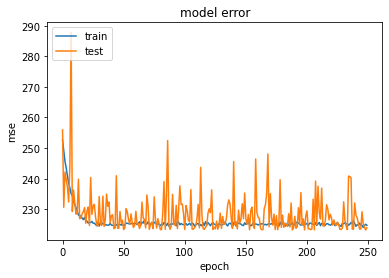

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### decreasing the number of nodes in hidden layer

In [27]:
model2=Sequential()
model2.add(Dense(3,  activation='relu'))
model2.add(Dense(2,  activation='relu'))
model2.add(Dense(1, activation='linear'))
model2.compile(loss='mean_squared_error', optimizer='adam')
history=model2.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 2s 2ms/step - loss: 23266.2637 - val_loss: 17417.4746
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: 18200.5781 - val_loss: 17166.1445
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: 17939.4707 - val_loss: 16909.7910
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: 17676.3633 - val_loss: 16653.5781
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: 17414.0410 - val_loss: 16398.6602
Epoch 6/250
1008/1008 [==============================] - 2s 2ms/step - loss: 17153.3711 - val_loss: 16145.6133
Epoch 7/250
1008/1008 [==============================] - 2s 2ms/step - loss: 16894.5566 - val_loss: 15894.4141
Epoch 8/250
1008/1008 [==============================] - 2s 2ms/step - loss: 16637.7012 - val_loss: 15645.2568
Epoch 9/250
1008/1008 [==============================] - 2s 2ms/step - loss: 16382.8896 - val_loss: 15398.1250
E

Epoch 75/250
1008/1008 [==============================] - 2s 2ms/step - loss: 4011.9487 - val_loss: 3532.4336
Epoch 76/250
1008/1008 [==============================] - 2s 2ms/step - loss: 3891.7310 - val_loss: 3419.8149
Epoch 77/250
1008/1008 [==============================] - 2s 2ms/step - loss: 3773.5601 - val_loss: 3309.3333
Epoch 78/250
1008/1008 [==============================] - 2s 2ms/step - loss: 3657.3640 - val_loss: 3200.6550
Epoch 79/250
1008/1008 [==============================] - 2s 2ms/step - loss: 3543.1299 - val_loss: 3094.0142
Epoch 80/250
1008/1008 [==============================] - 2s 2ms/step - loss: 3430.8687 - val_loss: 2989.3459
Epoch 81/250
1008/1008 [==============================] - 2s 2ms/step - loss: 3320.6003 - val_loss: 2886.6897
Epoch 82/250
1008/1008 [==============================] - 2s 2ms/step - loss: 3212.3896 - val_loss: 2786.0393
Epoch 83/250
1008/1008 [==============================] - 2s 2ms/step - loss: 3106.1013 - val_loss: 2687.3489
Epoch 84/2

Epoch 150/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.1656 - val_loss: 241.0908
Epoch 151/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.1237 - val_loss: 241.4640
Epoch 152/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0965 - val_loss: 241.7350
Epoch 153/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0789 - val_loss: 241.9713
Epoch 154/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0669 - val_loss: 242.1829
Epoch 155/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0574 - val_loss: 242.3496
Epoch 156/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0511 - val_loss: 242.4778
Epoch 157/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0472 - val_loss: 242.6015
Epoch 158/250
1008/1008 [==============================] - 2s 2ms/step - loss: 256.0457 - val_loss: 242.7291
Epoch 159/250
1008/

In [28]:
model2.evaluate(x1,y1)

470/470 [==============================] - 0s 1ms/step - loss: 251.7813


251.7812957763672

### This model gives a significantly worse error

### Adding an additional hidden layer to the model

In [29]:
model3=Sequential()
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='mean_squared_error', optimizer='adam')
history=model3.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 2s 2ms/step - loss: 1058.2042 - val_loss: 230.3096
Epoch 2/250
1008/1008 [==============================] - 2s 2ms/step - loss: 251.6859 - val_loss: 250.0341
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: 250.8150 - val_loss: 240.2342
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: 249.6532 - val_loss: 237.6200
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: 248.4989 - val_loss: 228.3279
Epoch 6/250
1008/1008 [==============================] - 2s 2ms/step - loss: 243.8526 - val_loss: 237.0173
Epoch 7/250
1008/1008 [==============================] - 2s 2ms/step - loss: 240.7374 - val_loss: 226.6844
Epoch 8/250
1008/1008 [==============================] - 2s 2ms/step - loss: 236.9081 - val_loss: 233.7857
Epoch 9/250
1008/1008 [==============================] - 2s 2ms/step - loss: 235.2844 - val_loss: 236.8372
Epoch 10/250
1008/1008 [============

Epoch 77/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.3622 - val_loss: 242.5144
Epoch 78/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.3282 - val_loss: 244.7887
Epoch 79/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.6743 - val_loss: 231.9927
Epoch 80/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.1461 - val_loss: 225.9351
Epoch 81/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.1777 - val_loss: 224.5767
Epoch 82/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.4687 - val_loss: 224.0551
Epoch 83/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.7537 - val_loss: 231.6296
Epoch 84/250
1008/1008 [==============================] - 2s 2ms/step - loss: 226.5474 - val_loss: 225.7449
Epoch 85/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.7288 - val_loss: 226.9185
Epoch 86/250
1008/1008 [====

1008/1008 [==============================] - 2s 2ms/step - loss: 225.1175 - val_loss: 232.8280
Epoch 228/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.4435 - val_loss: 230.6394
Epoch 229/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.4133 - val_loss: 224.4047
Epoch 230/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.5766 - val_loss: 223.7304
Epoch 231/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.9816 - val_loss: 225.5463
Epoch 232/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.2033 - val_loss: 239.0540
Epoch 233/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.4825 - val_loss: 242.1754
Epoch 234/250
1008/1008 [==============================] - 2s 2ms/step - loss: 225.2937 - val_loss: 224.3662
Epoch 235/250
1008/1008 [==============================] - 2s 2ms/step - loss: 224.9230 - val_loss: 224.3198
Epoch 236/250
1008/1008 [========

In [30]:
model3.evaluate(x1,y1)

470/470 [==============================] - 0s 1ms/step - loss: 223.4047


223.40472412109375

### Plotting the mse

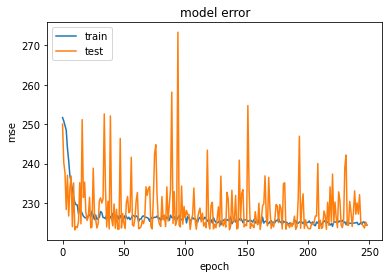

In [32]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### model and model3 has comparable accuracy and model is computationally simpler so model1 is taken as final model

In [33]:
model_final=model